In [21]:
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import numpy as np
from cvzone.HandTrackingModule import HandDetector

In [22]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [23]:
def detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [24]:
def draw_landmarks(image, results):
     #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [25]:
def style_of_landmarks(image, results):
    # draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
    #                         mp_drawing.DrawingSpec(color=(80,50,10), thickness=1,circle_radius=1),
    #                       mp_drawing.DrawingSpec(color=(80,50,10),thickness=1, circle_radius=1))
     # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
     # draw left connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
     # draw right connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
    
    

In [26]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [27]:
# define a video capture object
vid = cv2.VideoCapture(0)
detector = HandDetector(maxHands=2)
with mp_holistic.Holistic(min_detection_confidence =0.5, min_tracking_confidence=0.5) as holistic:
    while vid.isOpened():
        
        # Capture the video frame
        # by frame
        ret, frame = vid.read()
        hands, frame = detector.findHands(frame)
        # make detection
        image, results = detection(frame, holistic)
        
        # draw landmarks
        style_of_landmarks(image, results)

        # Display the resulting frame
        cv2.imshow('frame', image)
        
        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [28]:
results

mediapipe.python.solution_base.SolutionOutputs

In [29]:
draw_landmarks(frame, results)

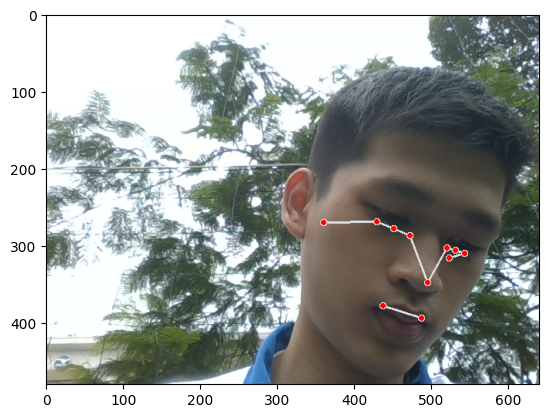

In [30]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [31]:
def extract_key_points(results):
    # take all marks possitions 
    # and put into an list of array
    # these pose will help for the action detection
    poses_list = np.array([[i.x, i.y, i.z, i.visibility] for i in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    left_hand = np.array([[i.x, i.y, i.z] for i in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[i.x, i.y, i.z] for i in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([poses_list, left_hand, right_hand])

In [32]:
result_test = extract_key_points(results)

In [33]:
np.save('0', result_test)

In [34]:
np.load('0.npy')

array([ 7.73935795e-01,  7.25558221e-01, -1.86290610e+00,  9.96338964e-01,
        8.12573075e-01,  6.32435858e-01, -1.60625398e+00,  9.94731724e-01,
        8.31045628e-01,  6.39281631e-01, -1.60607743e+00,  9.95447040e-01,
        8.49357784e-01,  6.46340132e-01, -1.60532594e+00,  9.94194627e-01,
        7.38881469e-01,  5.98173857e-01, -1.83058357e+00,  9.94719744e-01,
        7.05145121e-01,  5.79365373e-01, -1.83283162e+00,  9.95363355e-01,
        6.70328319e-01,  5.60575366e-01, -1.83233392e+00,  9.94840682e-01,
        8.18521202e-01,  6.60123169e-01, -6.25728250e-01,  9.95396972e-01,
        5.63006401e-01,  5.63979387e-01, -1.12021995e+00,  9.95673656e-01,
        7.61768222e-01,  8.20844948e-01, -1.43495202e+00,  9.92698073e-01,
        6.83516920e-01,  7.87642360e-01, -1.78168416e+00,  9.93992090e-01,
        8.82335663e-01,  1.13328755e+00, -2.45833680e-01,  8.12448382e-01,
        2.28664085e-01,  1.04969966e+00, -8.21467221e-01,  8.32603574e-01,
        1.01474118e+00,  

In [35]:
# Setup Folders for Collection
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello','iloveyou', 'ok'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [36]:
# CREATE FOLDER CONTAINS TRAINNING DATA/ SAMPLE ACTION DATA
# IF WANT TO CHANGE ANOTHER DATA BUT THE FOLDER ALREADY FULL
# DELETE THE FOLDER AND RUN THIS PART OF PROGRAM AGAIN

# for action in actions: 
#     for sequence in range(no_sequences):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

In [37]:
# # GET TRAINNING DATA
# # UNCOMMENT IF WANT TO USE THIS PART

# # TRAINNING DATA WILL BE GATHERED THROUGHT PICTURES OF ACTIONS THAT RELEVANT 
# # TO THE MESSAGE U WANT TO SHOW
# # HAVING 3 MAIN MESSAGES: HI, THANKS, LOVE 
# # THE COLLECTING PROCESS IS CONTINUOUS SO U 
# # U WILL HAVE 2-3 SECONDS TO CHANGE FORM OF YOUR ACTION BEFORE GO TO THE NEXT RECORD

# # NEED TO COLLECT 30 VID ~ 30 SAMPLE ACTIONS FOR EACH MESSAGE  
# # --> 30 VID FOR 1 MESSAGE * 3 MESSAGE = 90 VIDS :DD

# # ALL WILL BE SAVE INTO FOLDER CREATED BY ABOVE FUNCTION



# # vid = cv2.VideoCapture(0)
# # detector = HandDetector(maxHands=2)
# # with mp_holistic.Holistic(min_detection_confidence =0.5, min_tracking_confidence=0.5) as holistic:
# #     for action in actions:
# #         # Loop through sequences aka videos
# #         for sequence in range(no_sequences):
# #             # Loop through video length aka sequence length
# #             for frame_num in range(sequence_length):

# #                 # Read feed
# #                 ret, frame = vid.read()

# #                 # Make detections
# #                 image, results = detection(frame, holistic)
# # #                 print(results)

# #                 # Draw landmarks
# #                 style_of_landmarks(image, results)
                
# #                 # NEW Apply wait logic
# #                 if frame_num == 0: 
# #                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
# #                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
# #                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
# #                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
# #                     # Show to screen
# #                     cv2.imshow('OpenCV Feed', image)
# #                     # MODIFY THE RESTING TIME BETWEEN RECODS  
# #                     cv2.waitKey(2000)
# #                 else: 
# #                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
# #                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
# #                     # Show to screen
# #                     cv2.imshow('OpenCV Feed', image)
                
# #                 # NEW Export keypoints
# #                 keypoints = extract_key_points(results)
# #                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
# #                 np.save(npy_path, keypoints)

# #                 if cv2.waitKey(10) & 0xFF == ord('q'):
# #                     break
    
# # # After the loop release the cap object
# # vid.release()
# # # Destroy all the windows
# # cv2.destroyAllWindows()

In [38]:
vid.release()
cv2.destroyAllWindows()

In [39]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [40]:
label_map = {label:num for num,label in enumerate(actions)}

In [41]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)).replace("\\","//")
            res = np.load(path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [42]:
np.array(sequences).shape

(90, 30, 258)

In [43]:
np.array(labels).shape

(90,)

In [44]:
x = np.array(sequences)


In [45]:
x

array([[[ 0.49298111,  0.53805703, -0.90968883, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48260674,  0.52820283, -1.20643067, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48038587,  0.52285355, -1.21553755, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.50536299,  0.42615655, -1.05624866, ...,  0.05996576,
          0.62020957, -0.04687437],
        [ 0.50610024,  0.42633408, -1.03755212, ...,  0.06148414,
          0.61311454, -0.04467008],
        [ 0.50686657,  0.42591286, -1.00202537, ...,  0.06228398,
          0.6125986 , -0.047469  ]],

       [[ 0.5076713 ,  0.42607611, -1.00253725, ...,  0.06044619,
          0.61434072, -0.050092  ],
        [ 0.51323539,  0.42899674, -1.04634082, ...,  0.04010117,
          0.61787993, -0.05992625],
        [ 0.51503146,  0.43136197, -1.04347599, ...,  0.04096147,
          0.61523843, -0.05735405],
        ...,
        [ 0.51374757,  0.43636927, -1.01153827, ...,  

In [46]:
y = to_categorical(labels).astype(int)

In [47]:
y.shape

(90, 3)

In [48]:
x.shape

(90, 30, 258)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)


In [50]:
y_test.shape

(45, 3)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [52]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [53]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [54]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [55]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
2/2 [==============================] - 11s 119ms/step - loss: 1.1883 - categorical_accuracy: 0.3111
Epoch 2/2000
2/2 [==============================] - 0s 55ms/step - loss: 1.0248 - categorical_accuracy: 0.4222
Epoch 3/2000
2/2 [==============================] - 0s 58ms/step - loss: 1.0713 - categorical_accuracy: 0.4444
Epoch 4/2000
2/2 [==============================] - 0s 75ms/step - loss: 1.0093 - categorical_accuracy: 0.3778
Epoch 5/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.8183 - categorical_accuracy: 0.3778
Epoch 6/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.8886 - categorical_accuracy: 0.6000
Epoch 7/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.8800 - categorical_accuracy: 0.5778
Epoch 8/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.7912 - categorical_accuracy: 0.7333
Epoch 9/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.8351 - categorical_accuracy: 0.5111

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            82688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 237,251
Trainable params: 237,251
Non-trai

In [57]:
res = model.predict(X_test)

2/2 [==============================] - 1s 28ms/step


In [58]:
actions[np.argmax(res[4])]

'iloveyou'

In [59]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [60]:
model.save('action.h5')


In [61]:
model.load_weights('action.h5')

In [62]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [63]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 18ms/step


In [64]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [65]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[26,  2],
        [ 1, 16]],

       [[29,  1],
        [ 1, 14]],

       [[32,  0],
        [ 1, 12]]], dtype=int64)

In [66]:
accuracy_score(ytrue, yhat)

0.9333333333333333

In [67]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        style_of_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_key_points(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
########## DONT USE THIS PART!!!


# from cvzone.HandTrackingModule import HandDetector
# import cv2
# import numpy as np
# import math

# cap = cv2.VideoCapture(0)
# detector = HandDetector(maxHands=2)

# offset = 20
# imgSize = 300
# while True:
#     success, img = cap.read()
#     hands,img = detector.findHands(img)
#     if hands:
#         hand  = hands[0]
#         x, y, z, h = hand["bbox"]

#         imgWhite = np.ones((imgSize, imgSize, 3), np.uint8)*255
#         imgCrop = img[y - offset:y + h-offset, x-offset:x+z-offset]

#         imgCropShape = imgCrop.shape


#         aspectRatio = h/z
#         if aspectRatio >1:
#             k = imgSize/h
#             zCal = math.ceil(x+z)
#             imageResize = cv2.resize(imgCrop,(zCal, imgSize))
#             imgResizeShape = imageResize.shape
#             zGarp = math.ceil((300-zCal)/2)
#             imgWhite[0:150, zGarp:zGarp+zGarp] = imgCrop

#         cv2.imshow("ImageCrop", imgCrop)
#         cv2.imshow("ImageWhiter", imgWhite)
    
#     cv2.imshow("Image", img)
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break